# Source demonstration

In [1]:
# Import the Wastimate module
from Wastimate import *

In [8]:
# Create a radioactive waste package with a mass of 1, containing 1 GBq of Sr-90.
WastePackage   = Package(Mass=1, Inventory={"Sr90":1e9}, mode="activity")

# Create an empty node.
DisposalNode   = Node()

# Create a source that adds 1 package to DisposalNode every single timestep.
DisposalSource = Source(package=WastePackage, awaynode=DisposalNode, magnitude=1)

# Create a universe that contains the node and source. Define the timestep of the universe.
ModelUniverse = Universe(stepsize=1*60*60*24*365) + DisposalNode + DisposalSource

# Simulate 120 timesteps (120 years).
ModelUniverse.simulate(timesteps=120)

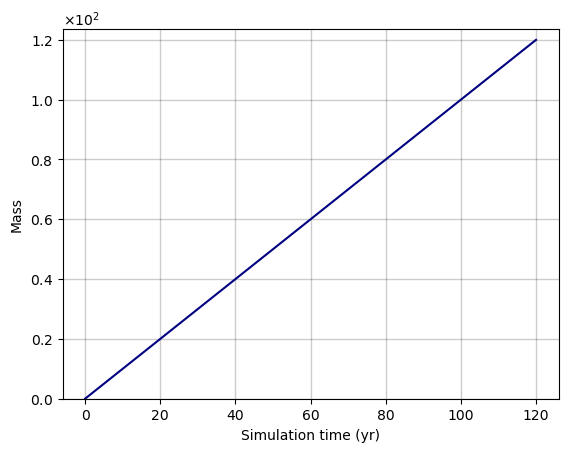

In [9]:
# Plot the mass of DisposalNode. Since 1 new package is added every timestep, the value increases.
plot1 = ModelUniverse.plot(DisposalNode, variable="mass", time_units="yr")

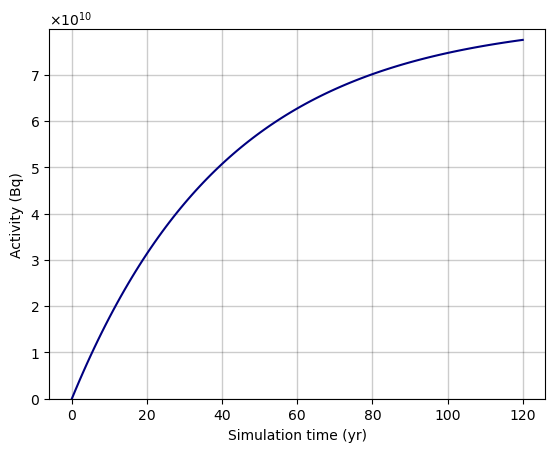

In [10]:
# Plot the activity of DisposalNode. Due to radioactive decay, the value decreases.
# Due to the addition of new packages, the value increases.
# As a net effect, the value resembles a curve that approaches an asymptotic value.
plot2 = ModelUniverse.plot(DisposalNode, variable="activity", time_units="yr")

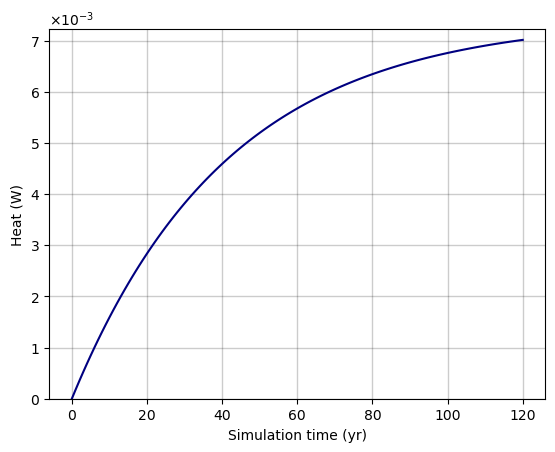

In [11]:
# Plot the decay heat of DisposalNode.
plot3 = ModelUniverse.plot(DisposalNode, variable="heat", time_units="yr")